In [56]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 746.1 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [57]:
# STANDARD LIBRARIES
import os
import warnings
warnings.filterwarnings("ignore")

# THIRD PARTY LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pydataset
import scipy.stats as stats
import category_encoders as ce

#statistical tests
from scipy import stats
from scipy.stats import pearsonr, spearmanr



# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
import matplotlib
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from math import sqrt

In [2]:
import acquire 
import prepare

In [3]:
df = acquire.get_fifa_data()

In [4]:
df = prepare.prepped_data(df)

Before dropping nulls, 20700 rows, 111 cols
After dropping nulls. 19457 rows. 66 cols
After cleaning the data and adding additional columns there are: 15373 rows. 80 cols


# Step 1: Assign all player positions to a dataframe

In [5]:
#GK
goalkeepers = df[(df.club_position == 'GK')]

In [7]:
#ST, RS, LS, LW, RW, LF, CF
forwards = df[(df.club_position == 'ST') | (df.club_position == 'RS') | (df.club_position == 'LS') | (df.club_position == 'LW') | (df.club_position == 'RW') | (df.club_position == 'LF') | (df.club_position == 'CF')]


In [8]:
#LCM, RCM, RM, LM, CAM, LDM, RDM, CDM, LAM, RAM 
midfielders = df[(df.club_position == 'LCM') | (df.club_position == 'RCM') | (df.club_position == 'RM') | (df.club_position == 'LM') | (df.club_position == 'CAM') | (df.club_position == 'LDM') | (df.club_position == 'RDM') | (df.club_position == 'CDM') | (df.club_position == 'LAM') | (df.club_position == 'RAM')] 


In [9]:
#RCB, LCB, LB, RB, CB, RWB, LWB
defenders = df[(df.club_position == 'RCB') | (df.club_position == 'LCB') | (df.club_position == 'LB') | (df.club_position == 'RB') | (df.club_position == 'CB') | (df.club_position == 'RWB') | (df.club_position == 'LWB')]

In [10]:
reserve = df[df.club_position == 'RES']
substitute = df[df.club_position == 'SUB']

# Step 2: Separate RESERVE Player dataframe by player position

In [15]:
reserve['player_positions'] = reserve['player_positions'].str.split(',').str[0]

In [16]:
df_reserve_goalkeepers = reserve[reserve.player_positions == 'GK']

In [17]:
#ST, RS, LS, LW, RW, LF, CF
df_reserve_forwards = reserve[(reserve.player_positions == 'ST') | (reserve.player_positions == 'RW') | (reserve.player_positions == 'LW') | (reserve.player_positions == 'CF')]

In [18]:
#LCM, RCM, RM, LM, CAM, LDM, RDM, CDM, LAM, RAM 
df_reserve_midfielders = reserve[(reserve.player_positions == 'CM') | (reserve.player_positions == 'CDM') | (reserve.player_positions == 'CAM') | (reserve.player_positions == 'RM') | (reserve.player_positions == 'LM')]

In [19]:
#RCB, LCB, LB, RB, CB, RWB, LWB
df_reserve_defenders = reserve[(reserve.player_positions == 'CB') | (reserve.player_positions == 'LB') | (reserve.player_positions == 'RB') | (reserve.player_positions == 'LWB') | (reserve.player_positions == 'RWB')]

# Step 3: Separate SUBSTITUTE Player dataframe by player position

In [27]:
substitute['player_positions'] = substitute['player_positions'].str.split(',').str[0]


In [28]:
df_substitute_goalkeeper = substitute[substitute.player_positions == 'GK']

In [29]:
df_substitute_forward = substitute[(substitute.player_positions == 'ST') | (substitute.player_positions == 'RW') | (substitute.player_positions == 'LW') | (substitute.player_positions == 'CF')]

In [30]:
df_substitute_midfielders = substitute[(substitute.player_positions == 'CM') | (substitute.player_positions == 'CDM') | (substitute.player_positions == 'CAM') | (substitute.player_positions == 'LM') | (substitute.player_positions == 'RM')]

In [31]:
df_substitute_defenders = substitute[(substitute.player_positions == 'CB') | (substitute.player_positions == 'LB') | (substitute.player_positions == 'RB') | (substitute.player_positions == 'RWB') | (substitute.player_positions == 'LWB')]

# Step 4: Concat Dataframes together 


In [32]:
goalkeeper_df = pd.concat([goalkeepers, df_substitute_goalkeeper, df_reserve_goalkeepers], axis=0)

In [33]:
forward_df = pd.concat([forwards, df_substitute_forward, df_reserve_forwards], axis=0)

In [34]:
midfielder_df = pd.concat([midfielders, df_substitute_midfielders, df_reserve_midfielders], axis=0)

In [35]:
defender_df = pd.concat([defenders, df_substitute_defenders, df_reserve_defenders], axis=0)

# Step 5: Correlation for each position

In [43]:
goalkeeper_df.corr()[['wage_eur']].sort_values(by='wage_eur', ascending=False).head(10)

,wage_eur
wage_eur,1.00
total_wage,0.81
value_eur,0.81
international_reputation,0.70
overall,0.62
gk_handling,0.60
gk_diving,0.59
gk_reflexes,0.59
potential,0.58
gk_positioning,0.56


In [44]:
forward_df.corr()[['wage_eur']].sort_values(by='wage_eur', ascending=False).head(10)

,wage_eur
wage_eur,1.00
total_wage,0.85
value_eur,0.85
international_reputation,0.73
overall,0.65
ball_control,0.60
reactions,0.60
dribbling,0.59
shooting,0.58
positioning,0.57


In [45]:
midfielder_df.corr()[['wage_eur']].sort_values(by='wage_eur', ascending=False).head(10)

,wage_eur
wage_eur,1.00
total_wage,0.84
value_eur,0.84
international_reputation,0.68
overall,0.64
ball_control,0.60
passing,0.59
reactions,0.59
short_passing,0.59
dribbling,0.57


In [106]:
defender_df.corr()[['wage_eur']].sort_values(by='wage_eur', ascending=False).head(15)

,wage_eur
wage_eur,1.00
total_wage,0.81
value_eur,0.81
international_reputation,0.67
overall,0.67
reactions,0.64
defending,0.63
sliding_tackle,0.63
standing_tackle,0.62
interceptions,0.62


# Clusters based on Correlation

_Prepare the Data_

In [49]:
#split
train, validate, test = prepare.split(goalkeeper_df)

Train: 1200 rows, 80 cols
Validate: 301 rows, 80 cols
Test: 265 rows, 80 cols


In [50]:
#split data
X_train = train.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_train = train[['wage_eur']]

X_validate = validate.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_validate = validate[['wage_eur']]

X_test = test.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_test = test[['wage_eur']]

_Encode categorical variables_ 

In [58]:
#encode categorical variables
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)
X_train_loo.shape

(1200, 77)

In [60]:
#scale data 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_loo, y_train)
X_train_scaled.shape

(1200, 77)

In [62]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.describe()

,sofifa_id,short_name,player_positions,overall,potential,age,height_cm,weight_kg,club_team_id,club_name,...,weight_bins,year_joined,seniority,club_position_encoded,work_rate_encoded,preferred_foot_encoded,age_bins_encoded,weight_bins_encoded,body_type_encoded,league_encoded
count,"1,200.00","1,200.00","1,200.00","1,200.00","1,200.00","1,200.00","1,200.00","1,200.00","1,200.00","1,200.00",...,"1,200.00","1,200.00","1,200.00","1,200.00","1,200.00","1,200.00","1,200.00","1,200.00","1,200.00","1,200.00"
mean,-0.13,"3,300.45",-0.97,0.00,0.10,0.07,0.08,0.01,0.44,0.78,...,235.33,-0.43,0.41,-0.06,0.00,-0.11,0.31,235.33,-0.02,0.24
std,0.71,"16,056.72",2.73,0.74,0.71,0.62,0.69,0.77,0.49,2.13,...,519.52,0.89,0.88,0.89,0.00,0.31,0.47,519.52,1.27,0.68
min,-4.60,"-9,555.50",-31.23,-1.58,-1.80,-1.00,-2.00,-2.12,-0.02,-0.33,...,"-1,660.66",-6.00,-0.33,-1.00,0.00,-1.00,-0.07,"-1,660.66",-3.00,-0.55
25%,-0.53,0.00,-0.85,-0.50,-0.40,-0.44,-0.43,-0.50,-0.01,-0.28,...,-0.89,-0.67,-0.33,-1.00,0.00,0.00,-0.00,-0.89,0.00,-0.30
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.47,0.00,0.15,0.50,0.60,0.56,0.57,0.50,0.99,0.72,...,0.11,0.33,0.67,0.00,0.00,0.00,1.00,0.11,0.00,0.70
max,0.69,"189,944.50",0.18,2.08,2.30,1.89,2.14,2.88,1.03,27.22,...,"1,250.59",0.33,5.67,1.43,0.00,0.00,1.01,"1,250.59",5.00,1.85


# Goalkeeper Clusters

#### ANOVA test on gk_handling, gk_diving, gk_reflexes

In [65]:
#significance level 
a = 0.05 
#define x 
X = X_train_scaled_df[['gk_handling', 'gk_diving', 'gk_reflexes']]
#define kmeans
kmeans = KMeans(n_clusters=4)
#fit 
kmeans.fit(X)

KMeans(n_clusters=4)

In [67]:
train['clusters'] = kmeans.predict(X)

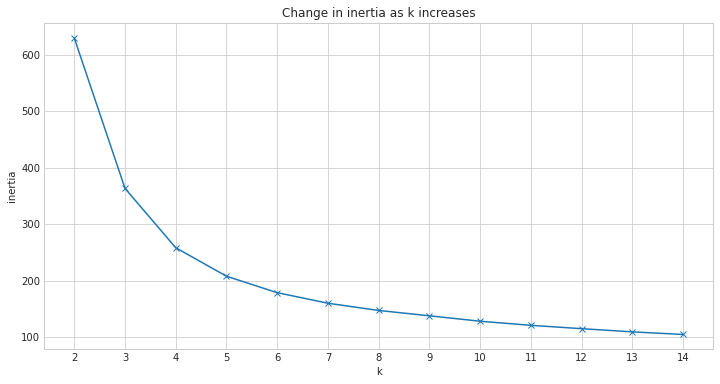

In [68]:
# Find K: evaluate best k using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [70]:
train.groupby('clusters')[ 'gk_handling', 'gk_diving', 'gk_reflexes'].median()

,gk_handling,gk_diving,gk_reflexes
clusters,,,
0,77.00,80.00,82.00
1,54.00,57.00,56.00
2,62.00,64.00,64.00
3,69.00,71.00,73.00


#### _The ANOVA test will be used to measure the significance or lack there of variance between clusters_

 - H0: There is no significant difference between salaries of each cluster 
 - HA: There is a significant difference between salaries of each cluster

In [73]:
alpha = 0.05

F, p = stats.f_oneway(train[train.clusters == 0].wage_eur,
                      train[train.clusters == 1].wage_eur,
                      train[train.clusters == 2].wage_eur,
                      train[train.clusters == 3].wage_eur)

print('Anova Test Results on goalkeeper handling/diving/reflexes Cluster')
print('F-value: ',F)
print('p-value: ',p)
#if p > alpha:
    #print("\nWe fail to reject null hypothesis.")
#elif t < 0:
    #print("We fail to reject null hypothesis.")
#else:
    #print("We reject null hypothesis.\n\n")

Anova Test Results on goalkeeper handling/diving/reflexes Cluster
F-value:  274.9144383077501
p-value:  1.0828884379638766e-135


# Prepare Forwards

In [74]:
#split
train, validate, test = prepare.split(forward_df)

Train: 1989 rows, 80 cols
Validate: 498 rows, 80 cols
Test: 439 rows, 80 cols


In [75]:
#split data
X_train = train.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_train = train[['wage_eur']]

X_validate = validate.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_validate = validate[['wage_eur']]

X_test = test.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_test = test[['wage_eur']]

In [76]:
#encode categorical variables
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)
X_train_loo.shape

(1989, 77)

In [77]:
#scale data 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_loo, y_train)
X_train_scaled.shape

(1989, 77)

In [78]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# FORWARD CLUSTERS

#### ANOVA test on ball_control, reactions, dribbling

In [79]:
#significance level 
a = 0.05 
#define x 
X = X_train_scaled_df[['ball_control', 'reactions', 'dribbling']]
#define kmeans
kmeans = KMeans(n_clusters=4)
#fit 
kmeans.fit(X)

KMeans(n_clusters=4)

In [80]:
train['clusters'] = kmeans.predict(X)

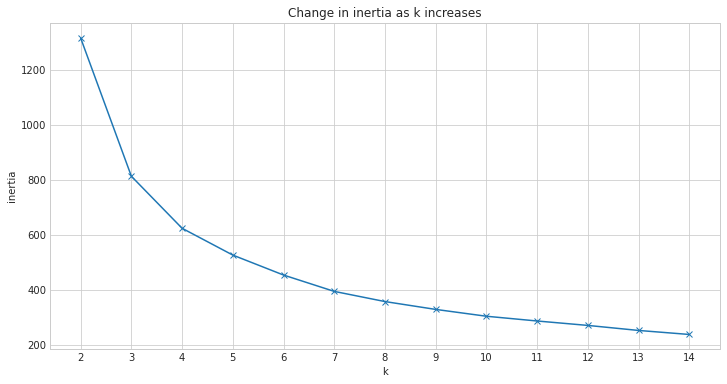

In [81]:
# Find K: evaluate best k using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [82]:
train.groupby('clusters')[ 'ball_control', 'reactions', 'dribbling'].median()

,ball_control,reactions,dribbling
clusters,,,
0,65.00,60.00,64.00
1,72.00,69.00,71.00
2,80.00,79.00,80.00
3,56.00,52.00,56.00


#### _The ANOVA test will be used to measure the significance or lack there of variance between clusters_

 - H0: There is no significant difference between salaries of each cluster 
 - HA: There is a significant difference between salaries of each cluster

In [83]:
alpha = 0.05

F, p = stats.f_oneway(train[train.clusters == 0].wage_eur,
                      train[train.clusters == 1].wage_eur,
                      train[train.clusters == 2].wage_eur,
                      train[train.clusters == 3].wage_eur)

print('Anova Test Results on goalkeeper handling/diving/reflexes Cluster')
print('F-value: ',F)
print('p-value: ',p)
#if p > alpha:
    #print("\nWe fail to reject null hypothesis.")
#elif t < 0:
    #print("We fail to reject null hypothesis.")
#else:
    #print("We reject null hypothesis.\n\n")

Anova Test Results on goalkeeper handling/diving/reflexes Cluster
F-value:  449.02470459555894
p-value:  1.223655017896163e-222


# Prepare Midfielders

In [88]:
#split
train, validate, test = prepare.split(midfielder_df)

Train: 3824 rows, 80 cols
Validate: 957 rows, 80 cols
Test: 844 rows, 80 cols


In [89]:
#split data
X_train = train.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_train = train[['wage_eur']]

X_validate = validate.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_validate = validate[['wage_eur']]

X_test = test.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_test = test[['wage_eur']]

In [90]:
#encode categorical variables
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)
X_train_loo.shape

(3824, 77)

In [91]:
#scale data 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_loo, y_train)
X_train_scaled.shape

(3824, 77)

In [92]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Midfielder Cluster

#### ANOVA test on ball_control, reactions, passing

In [93]:
#significance level 
a = 0.05 
#define x 
X = X_train_scaled_df[['ball_control', 'reactions', 'passing']]
#define kmeans
kmeans = KMeans(n_clusters=4)
#fit 
kmeans.fit(X)

KMeans(n_clusters=4)

In [94]:
train['clusters'] = kmeans.predict(X)

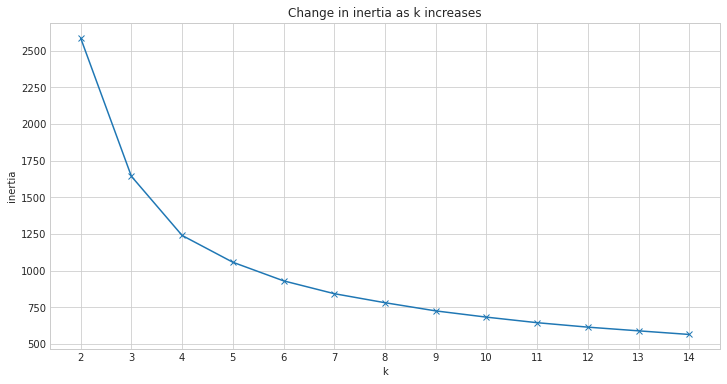

In [95]:
# Find K: evaluate best k using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [96]:
train.groupby('clusters')[ 'ball_control', 'reactions', 'passing'].median()

,ball_control,reactions,passing
clusters,,,
0,65.00,60.00,60.00
1,80.00,77.00,76.00
2,56.00,51.00,52.00
3,72.00,68.00,67.00


#### _The ANOVA test will be used to measure the significance or lack there of variance between clusters_

 - H0: There is no significant difference between salaries of each cluster 
 - HA: There is a significant difference between salaries of each cluster

In [97]:
alpha = 0.05

F, p = stats.f_oneway(train[train.clusters == 0].wage_eur,
                      train[train.clusters == 1].wage_eur,
                      train[train.clusters == 2].wage_eur,
                      train[train.clusters == 3].wage_eur)

print('Anova Test Results on goalkeeper handling/diving/reflexes Cluster')
print('F-value: ',F)
print('p-value: ',p)
#if p > alpha:
    #print("\nWe fail to reject null hypothesis.")
#elif t < 0:
    #print("We fail to reject null hypothesis.")
#else:
    #print("We reject null hypothesis.\n\n")

Anova Test Results on goalkeeper handling/diving/reflexes Cluster
F-value:  829.7447827016706
p-value:  0.0


# Prepare Defenders

In [101]:
#split
train, validate, test = prepare.split(defender_df)

Train: 3437 rows, 80 cols
Validate: 860 rows, 80 cols
Test: 759 rows, 80 cols


In [102]:
#split data
X_train = train.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_train = train[['wage_eur']]

X_validate = validate.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_validate = validate[['wage_eur']]

X_test = test.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_test = test[['wage_eur']]

In [103]:
#encode categorical variables
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)
X_train_loo.shape

(3437, 77)

In [104]:
#scale data 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_loo, y_train)
X_train_scaled.shape

(3437, 77)

In [105]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Defender Clusters 

#### ANOVA test on marking, potential, short_passing

In [107]:
#significance level 
a = 0.05 
#define x 
X = X_train_scaled_df[['marking', 'potential', 'short_passing']]
#define kmeans
kmeans = KMeans(n_clusters=4)
#fit 
kmeans.fit(X)

KMeans(n_clusters=4)

In [108]:
train['clusters'] = kmeans.predict(X)

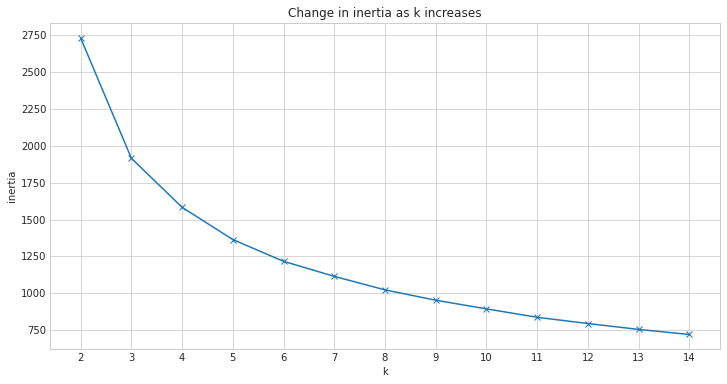

In [109]:
# Find K: evaluate best k using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [110]:
train.groupby('clusters')[ 'ball_control', 'reactions', 'passing'].median()

,ball_control,reactions,passing
clusters,,,
0,44.00,50.00,38.00
1,64.00,66.00,58.00
2,57.00,58.00,51.00
3,72.00,75.00,66.00


#### _The ANOVA test will be used to measure the significance or lack there of variance between clusters_

 - H0: There is no significant difference between salaries of each cluster 
 - HA: There is a significant difference between salaries of each cluster

In [113]:
alpha = 0.05

F, p = stats.f_oneway(train[train.clusters == 0].wage_eur,
                      train[train.clusters == 1].wage_eur,
                      train[train.clusters == 2].wage_eur,
                      train[train.clusters == 3].wage_eur)

print('Anova Test Results on goalkeeper handling/diving/reflexes Cluster')
print('F-value: ',F)
print('p-value: ',p)
#if p > alpha:
    #print("\nWe fail to reject null hypothesis.")
#elif t < 0:
    #print("We fail to reject null hypothesis.")
#else:
    #print("We reject null hypothesis.\n\n")

Anova Test Results on goalkeeper handling/diving/reflexes Cluster
F-value:  945.0582927446194
p-value:  0.0
